In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score    

from math import ceil

In [ ]:
import kagglehub
path = kagglehub.dataset_download("spscientist/students-performance-in-exams")
print("Path to dataset files:", path)



Path to dataset files: /Users/prasanna/.cache/kagglehub/datasets/spscientist/students-performance-in-exams/versions/1


In [13]:
import os

csv_path = os.path.join(path, "StudentsPerformance.csv")
df = pd.read_csv(csv_path)

df.head()


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [14]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   gender                       1000 non-null   str  
 1   race/ethnicity               1000 non-null   str  
 2   parental level of education  1000 non-null   str  
 3   lunch                        1000 non-null   str  
 4   test preparation course      1000 non-null   str  
 5   math score                   1000 non-null   int64
 6   reading score                1000 non-null   int64
 7   writing score                1000 non-null   int64
dtypes: int64(3), str(5)
memory usage: 62.6 KB


Train test split


In [15]:
df = pd.read_csv(csv_path)
df = df.rename(columns={
    'math score': 'Math_Score',
    'reading score': 'Reading_Score',
    'writing score': 'Writing_Score',
})

# Example derived target/summary metric
df['Placement_Score'] = df[['Math_Score', 'Reading_Score', 'Writing_Score']].mean(axis=1)

df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,Math_Score,Reading_Score,Writing_Score,Placement_Score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


In [16]:
correlation_matrix = df[['Math_Score', 'Reading_Score', 'Writing_Score', 'Placement_Score']].corr()
print(correlation_matrix)

                 Math_Score  Reading_Score  Writing_Score  Placement_Score
Math_Score         1.000000       0.817580       0.802642         0.918746
Reading_Score      0.817580       1.000000       0.954598         0.970331
Writing_Score      0.802642       0.954598       1.000000         0.965667
Placement_Score    0.918746       0.970331       0.965667         1.000000


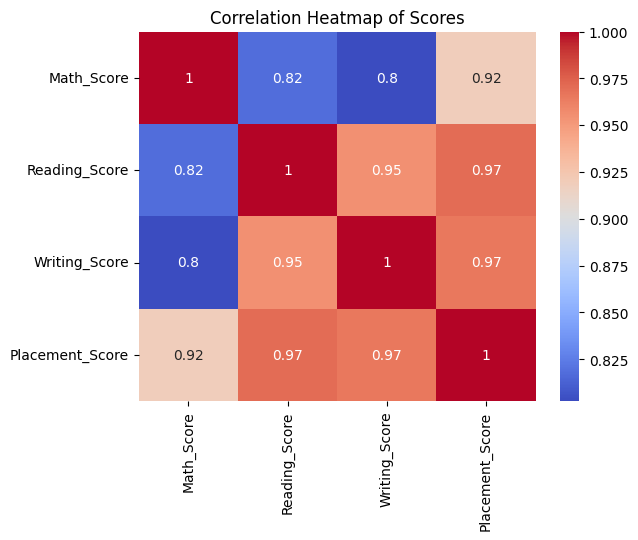

In [17]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Scores')
plt.show()

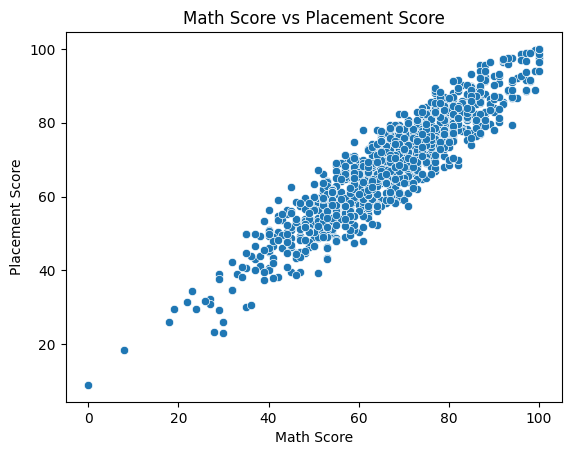

In [18]:
sns.scatterplot(x='Math_Score', y='Placement_Score', data=df)
plt.title('Math Score vs Placement Score')
plt.xlabel('Math Score')
plt.ylabel('Placement Score')
plt.show()


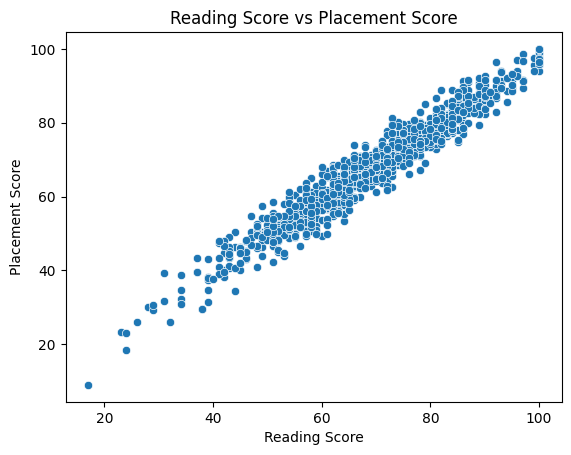

In [19]:
sns.scatterplot(x='Reading_Score', y='Placement_Score', data=df)
plt.title('Reading Score vs Placement Score')
plt.xlabel('Reading Score')
plt.ylabel('Placement Score')
plt.show()


Reading_Score                                    0.970331
Writing_Score                                    0.965667
Math_Score                                       0.918746
lunch_standard                                   0.290064
test preparation course_none                    -0.256710
parental level of education_high school         -0.161936
race/ethnicity_group E                           0.141050
gender_male                                     -0.130861
parental level of education_bachelor's degree    0.106599
parental level of education_master's degree      0.102411
parental level of education_some high school    -0.087247
race/ethnicity_group B                          -0.078247
race/ethnicity_group D                           0.058902
race/ethnicity_group C                          -0.030691
parental level of education_some college         0.026761
dtype: float64


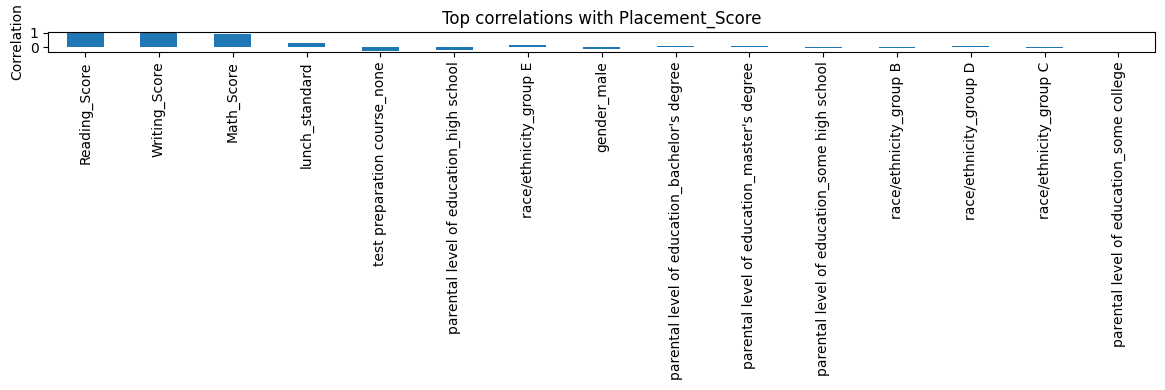

In [20]:
# Target
target_col = "Placement_Score"
y = df[target_col]

# Features (encode categorical columns)
X = df.drop(columns=[target_col])
X_encoded = pd.get_dummies(X, drop_first=True)

# Correlation of each feature with target
corr_with_target = X_encoded.corrwith(y).sort_values(key=lambda s: s.abs(), ascending=False)
print(corr_with_target.head(20))

# Optional plot
corr_with_target.head(20).plot(kind="bar", figsize=(12, 4), title="Top correlations with Placement_Score")
plt.ylabel("Correlation")
plt.tight_layout()
plt.show()

<h1> Regression model with train_test_split


MSE:  0.0000
RMSE: 0.0000
R2:   1.0000


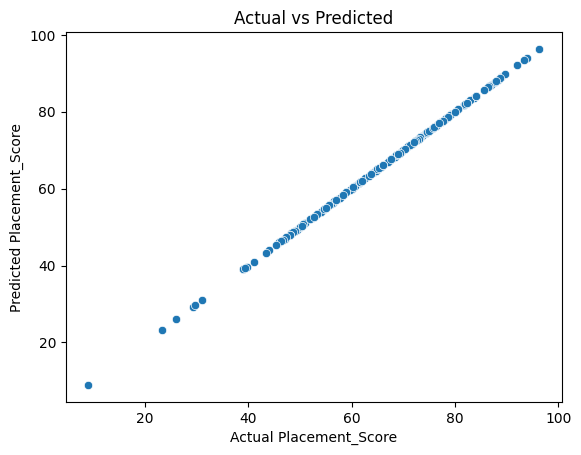

In [21]:

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test) 

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MSE:  {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"R2:   {r2:.4f}")

# Optional: actual vs predicted plot
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Placement_Score")
plt.ylabel("Predicted Placement_Score")
plt.title("Actual vs Predicted")
plt.show()

<h2>Boxplot

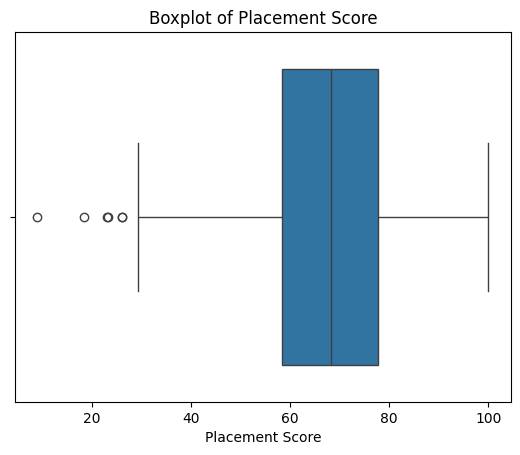

In [22]:

sns.boxplot(x=df['Placement_Score'])
plt.title('Boxplot of Placement Score')
plt.xlabel('Placement Score')
plt.show()



<h3> Histogram 

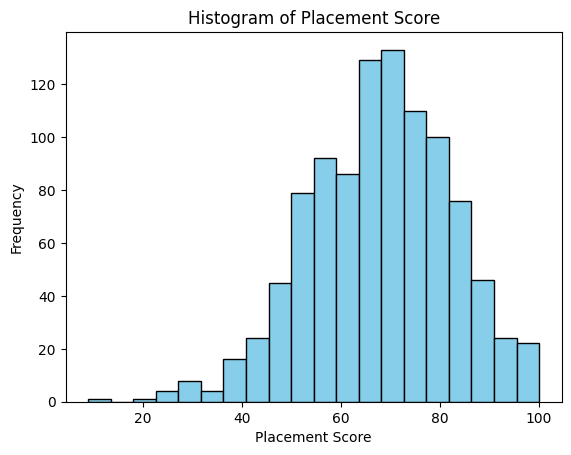

In [23]:

plt.hist(df['Placement_Score'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Placement Score')
plt.xlabel('Placement Score')
plt.ylabel('Frequency')
plt.show()